# Service types provision assessment

In [4]:
from blocksnet.models import City
city_model = City.from_pickle('new_model.pickle')
service_type = city_model['school']

In [5]:
from blocksnet.method.provision.provision import Provision, ProvisionMethod
prov = Provision(city_model=city_model)

In [6]:
calc_before = prov.calculate(service_type, method=ProvisionMethod.GRAVITATIONAL, self_supply=True)

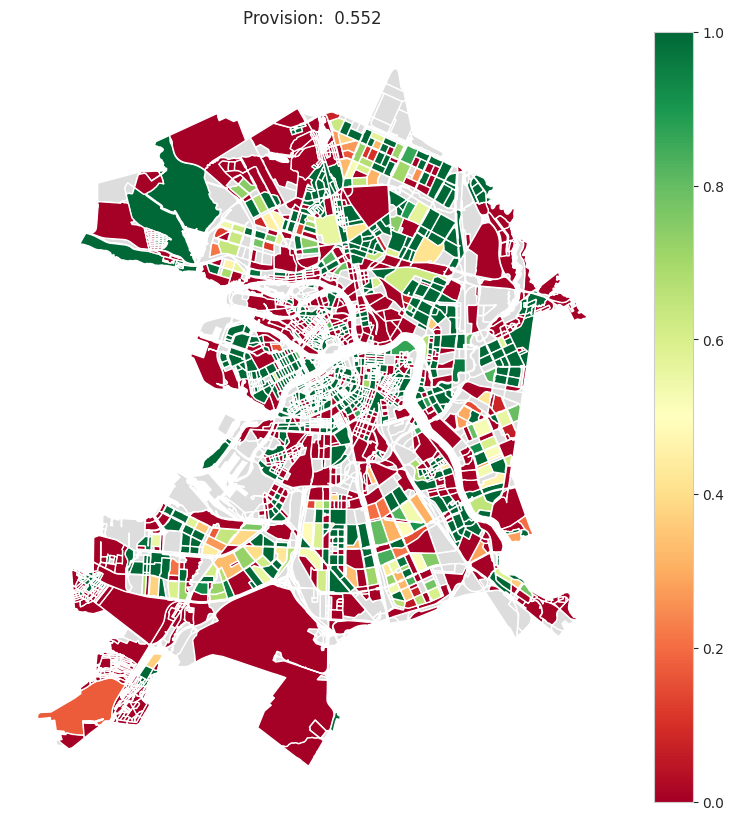

In [7]:
prov.plot(calc_before)

``get_bounds()`` method returns lower and upper bounds of possible assessment for a ``City``

Thus, ``total_provision()`` will always be somewhere in between

In [8]:
total = prov.total_provision(calc_before)
bounds = prov.get_bounds(service_type)
print(f'{bounds[0]} -> {total} -> {bounds[1]}')

0.42417623564653023 -> 0.552209186220669 -> 0.8879056415376935


## Context provision

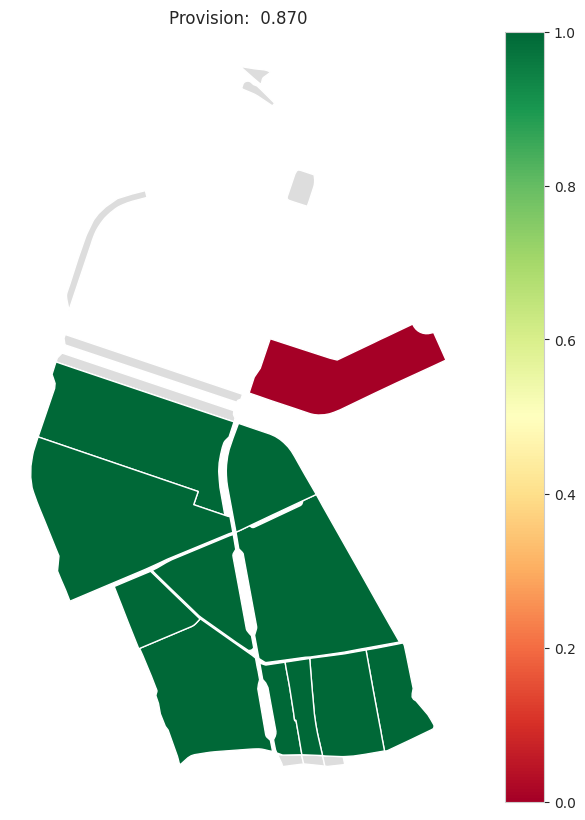

In [19]:
from blocksnet import Accessibility

context_blocks = Accessibility(city_model=city_model).get_context([1875, 1876], service_type)
prov.plot(calc_before.loc[context_blocks.index])

## Update provision

In [6]:
import pandas as pd

update = {
  148: {
    'population': 10000,
  }
}

update_df = pd.DataFrame.from_dict(update, orient='index')

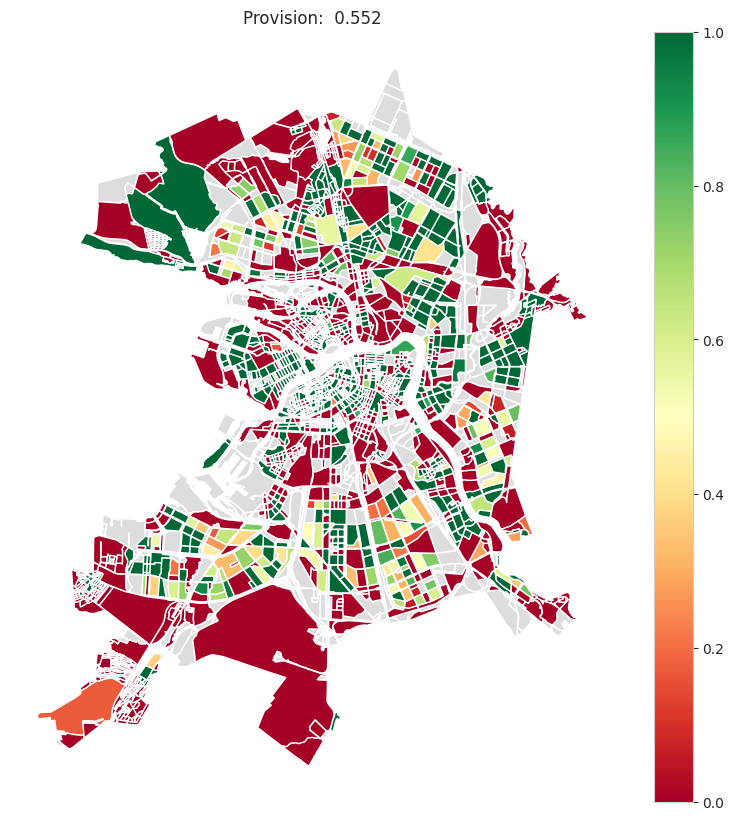

In [7]:
calc_after = prov.calculate(service_type, update_df=update_df, method=ProvisionMethod.GRAVITATIONAL, self_supply=True)
prov.plot(calc_after)

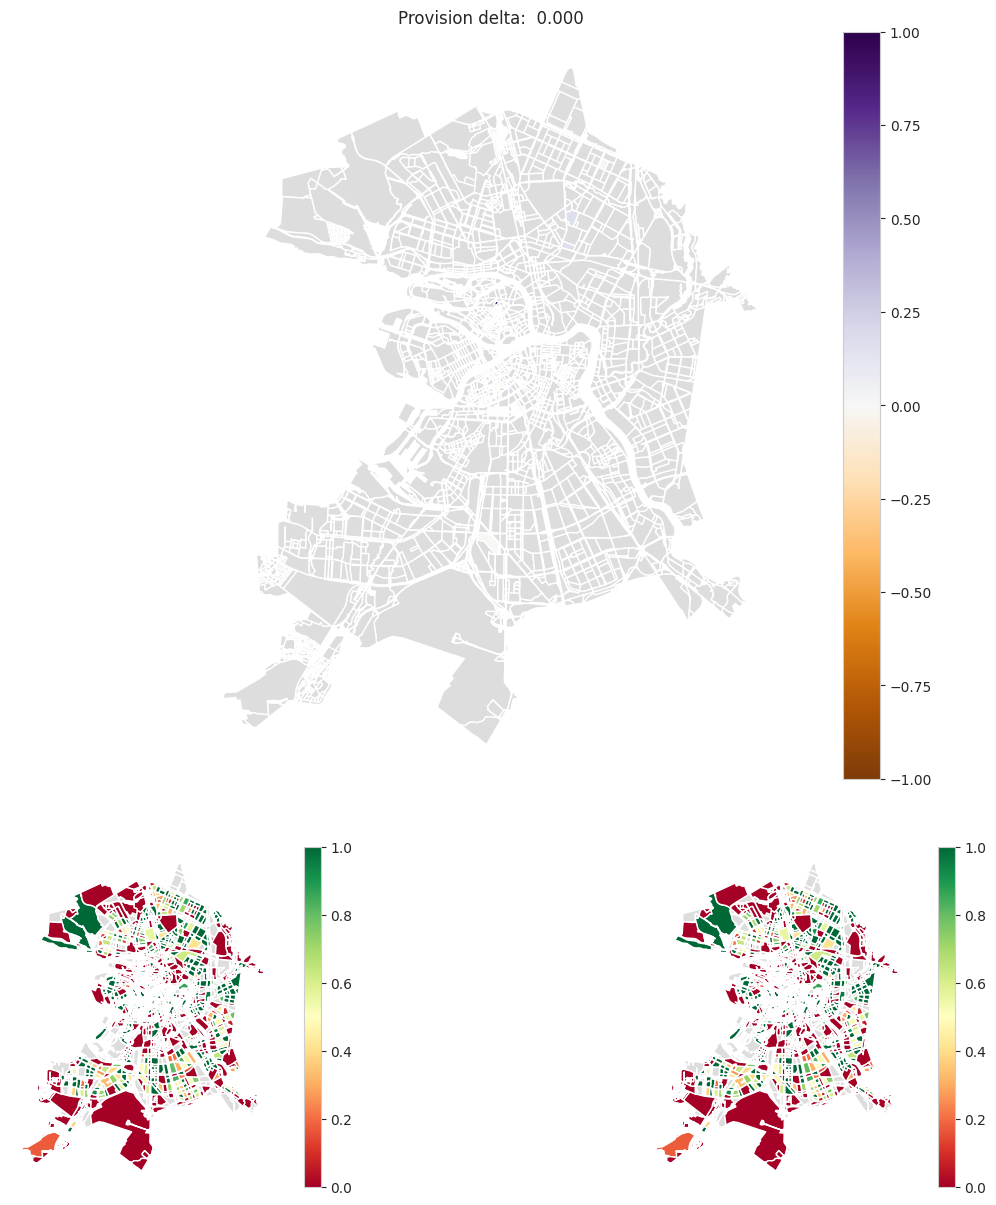

In [17]:
prov.plot_delta(calc_before, calc_after, figsize=(15,15))

In [9]:
Provision.stat_provision(calc_before)

{'mean': 0.4448610453604737, 'median': 0.0, 'min': 0.0, 'max': 1.0}

In [10]:
Provision.stat_provision(calc_after)

{'mean': 0.4467288929597837, 'median': 0.0, 'min': 0.0, 'max': 1.0}

In [12]:
scenario = {'school': 0.5, 'kindergarten': 0.5}
gdf, total = prov.calculate_scenario(scenario, self_supply=True)
print(total)

0.600466529881682


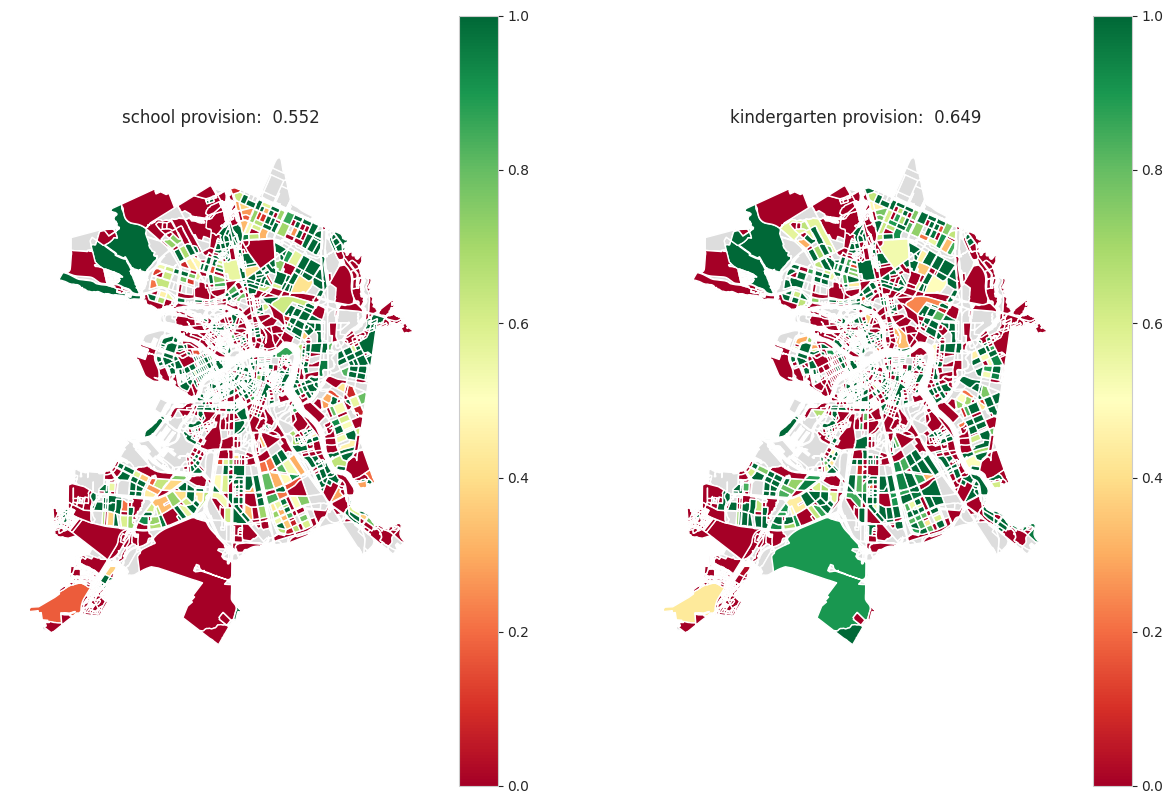

In [15]:
prov.plot_provisions(gdf, (15,10))

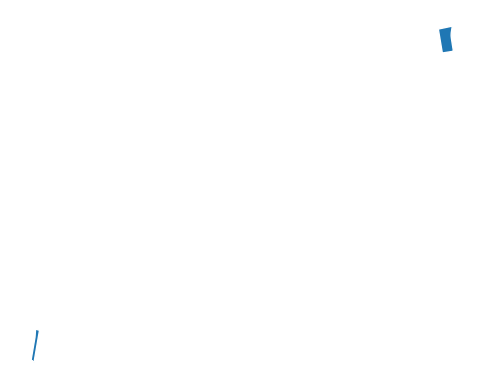